In [373]:
# Author       : Divakar
# E-Mail       : divakarapm@gmail.com

In [ ]:
#Impoting the libirires
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import chart_studio.plotly.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

Data Preprocessing and Feature extraction

In [374]:
# Getting the log file from local folder
f1 = open("D:/ML/apache_logs.txt", "r")

In [233]:
logvalue = f1.readline()

In [243]:
value = logvalue.split(' ')
print(value)
print(value[0]+' '+value[3]+' '+value[5]+' '+value[8], value[9],value[10],value[11])

['81.149.9.211', '-', '-', '[17/May/2015:10:05:03', '+0000]', '"GET', '/presentations/logstash-monitorama-2013/images/kibana-search.png', 'HTTP/1.1"', '401', '203023', '"http://semicomplete.com/presentations/logstash-monitorama-2013/"', '"Mozilla/5.0', '(Macintosh;', 'Intel', 'Mac', 'OS', 'X', '10_9_1)', 'AppleWebKit/537.36', '(KHTML,', 'like', 'Gecko)', 'Chrome/32.0.1700.77', 'Safari/537.36"\n']
81.149.9.211 [17/May/2015:10:05:03 "GET 401 203023 "http://semicomplete.com/presentations/logstash-monitorama-2013/" "Mozilla/5.0


In [294]:
#Split each line get the fields required for building the model
df = pd.DataFrame()
for x in f1:
    #splitvalue = x.split(' - - ')
    #ip_address = splitvalue[0]
    #timestamp = re.search(r'\[(.*)\]', splitvalue[1]).group(1)
    #statuscode = find_status_code(splitvalue[1])     
    #splitdata = splitvalue[1].split(' ')
    value = x.split(' ')
    df = df.append({'ip_address':value[0],'timestamp':value[3], "statuscode" : value[8], "method" : value[5], "size" : value[9],"url":value[10],"browser" : value[11] }, ignore_index=True)

In [295]:
df.head(10)

,browser,ip_address,method,size,statuscode,timestamp,url
0,"""Mozilla/5.0",81.149.9.211,"""GET",203023,401,[17/May/2015:10:05:03,"""http://semicomplete.com/presentations/logstas..."
1,"""Mozilla/5.0",81.149.9.211,"""GET",171717,401,[17/May/2015:10:05:43,"""http://semicomplete.com/presentations/logstas..."
2,"""Mozilla/5.0",83.149.9.216,"""GET",26185,200,[17/May/2015:10:05:47,"""http://semicomplete.com/presentations/logstas..."
3,"""Mozilla/5.0",83.149.9.211,"""GET",7697,401,[17/May/2015:10:05:12,"""http://semicomplete.com/presentations/logstas..."
4,"""Mozilla/5.0",83.149.9.216,"""GET",2892,200,[17/May/2015:10:05:07,"""http://semicomplete.com/presentations/logstas..."
5,"""Mozilla/5.0",83.149.9.211,"""GET",430406,401,[17/May/2015:10:05:34,"""http://semicomplete.com/presentations/logstas..."
6,"""Mozilla/5.0",83.149.9.216,"""GET",38720,200,[17/May/2015:10:05:57,"""http://semicomplete.com/presentations/logstas..."
7,"""Mozilla/5.0",83.149.9.216,"""GET",41820,200,[17/May/2015:10:05:50,"""http://semicomplete.com/presentations/logstas..."
8,"""Mozilla/5.0",83.149.9.216,"""GET",52878,200,[17/May/2015:10:05:24,"""http://semicomplete.com/presentations/logstas..."
9,"""Mozilla/5.0",83.149.9.216,"""GET",321631,200,[17/May/2015:10:05:50,"""http://semicomplete.com/presentations/logstas..."


In [296]:
df.describe()

,browser,ip_address,method,size,statuscode,timestamp,url
count,10000,10000,10000,10000,10000,10000,10000
unique,77,1755,4,1016,11,4362,628
top,"""Mozilla/5.0",66.249.73.135,"""GET",3638,200,[19/May/2015:00:05:25,"""-"""
freq,8045,482,9952,789,9095,9,4073


In [297]:
#Removing the duplicate values
list(dict.fromkeys(df))

['browser', 'ip_address', 'method', 'size', 'statuscode', 'timestamp', 'url']

In [298]:
df.describe()

,browser,ip_address,method,size,statuscode,timestamp,url
count,10000,10000,10000,10000,10000,10000,10000
unique,77,1755,4,1016,11,4362,628
top,"""Mozilla/5.0",66.249.73.135,"""GET",3638,200,[19/May/2015:00:05:25,"""-"""
freq,8045,482,9952,789,9095,9,4073


In [299]:
tx_logdetails = df.query("size > '0'")

In [347]:
tx_logdetails.describe()

,cluster,cluster_size
count,9331.000000,9331.000000
mean,0.060765,0.005894
std,0.303348,0.090654
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,2.000000,2.000000


In [301]:
qwq = int(tx_logdetails["statuscode"][0])

Model Building - Kmeans algorithm 

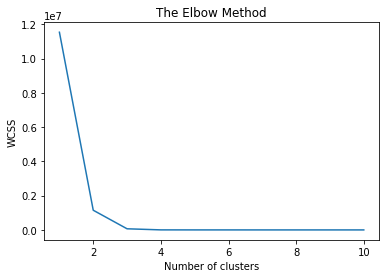

In [375]:
# FInding the centroids
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(tx_logdetails[["statuscode"]])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [322]:
# Running the kmeans algorithm
kmeans = KMeans(n_clusters=3)
kmeans.fit(tx_logdetails[["statuscode"]])
tx_logdetails["cluster"] = kmeans.predict(tx_logdetails[["statuscode"]])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [348]:
tx_logdetails.head(10)

,browser,ip_address,method,size,statuscode,timestamp,url,cluster,cluster_size
0,"""Mozilla/5.0",81.149.9.211,"""GET",203023,401,[17/May/2015:10:05:03,"""http://semicomplete.com/presentations/logstas...",1,0
1,"""Mozilla/5.0",81.149.9.211,"""GET",171717,401,[17/May/2015:10:05:43,"""http://semicomplete.com/presentations/logstas...",1,0
2,"""Mozilla/5.0",83.149.9.216,"""GET",26185,200,[17/May/2015:10:05:47,"""http://semicomplete.com/presentations/logstas...",0,0
3,"""Mozilla/5.0",83.149.9.211,"""GET",7697,401,[17/May/2015:10:05:12,"""http://semicomplete.com/presentations/logstas...",1,0
4,"""Mozilla/5.0",83.149.9.216,"""GET",2892,200,[17/May/2015:10:05:07,"""http://semicomplete.com/presentations/logstas...",0,0
5,"""Mozilla/5.0",83.149.9.211,"""GET",430406,401,[17/May/2015:10:05:34,"""http://semicomplete.com/presentations/logstas...",1,0
6,"""Mozilla/5.0",83.149.9.216,"""GET",38720,200,[17/May/2015:10:05:57,"""http://semicomplete.com/presentations/logstas...",0,0
7,"""Mozilla/5.0",83.149.9.216,"""GET",41820,200,[17/May/2015:10:05:50,"""http://semicomplete.com/presentations/logstas...",0,0
8,"""Mozilla/5.0",83.149.9.216,"""GET",52878,200,[17/May/2015:10:05:24,"""http://semicomplete.com/presentations/logstas...",0,0
9,"""Mozilla/5.0",83.149.9.216,"""GET",321631,200,[17/May/2015:10:05:50,"""http://semicomplete.com/presentations/logstas...",0,0


In [324]:
clusterdetails = tx_logdetails.groupby('cluster').count().reset_index()

In [370]:
clusterwitherrors = tx_logdetails.query("cluster > 0")
clusterwitherrors.head()

,browser,ip_address,method,size,statuscode,timestamp,url,cluster,cluster_size
0,"""Mozilla/5.0",81.149.9.211,"""GET",203023,401,[17/May/2015:10:05:03,"""http://semicomplete.com/presentations/logstas...",1,0
1,"""Mozilla/5.0",81.149.9.211,"""GET",171717,401,[17/May/2015:10:05:43,"""http://semicomplete.com/presentations/logstas...",1,0
3,"""Mozilla/5.0",83.149.9.211,"""GET",7697,401,[17/May/2015:10:05:12,"""http://semicomplete.com/presentations/logstas...",1,0
5,"""Mozilla/5.0",83.149.9.211,"""GET",430406,401,[17/May/2015:10:05:34,"""http://semicomplete.com/presentations/logstas...",1,0
12,"""Mozilla/5.0",83.149.9.216,"""GET",8095,400,[17/May/2015:10:05:19,"""http://semicomplete.com/presentations/logstas...",1,0


In [372]:
cluster2 = tx_logdetails.query("cluster == 2")
cluster2.head()

,browser,ip_address,method,size,statuscode,timestamp,url,cluster,cluster_size
149,"""Mozilla/5.0",134.76.249.10,"""GET",339,301,[17/May/2015:11:05:47,"""http://tuxradar.com/content/xdotool-script-yo...",2,0
282,"""Mozilla/5.0",108.32.74.68,"""GET",341,301,[17/May/2015:12:05:42,"""http://www.semicomplete.com/projects/xdotool/""",2,0
287,"""Mozilla/5.0",108.32.74.68,"""GET",341,301,[17/May/2015:12:05:37,"""http://www.semicomplete.com/projects/xdotool/""",2,0
386,"""-""\n",144.76.194.187,"""GET",323,301,[17/May/2015:13:05:46,"""-""",2,0
394,"""-""\n",144.76.194.187,"""GET",323,301,[17/May/2015:13:05:19,"""-""",2,0


In [319]:
tx_logdetails['statuscode'].unique()

array(['401', '200', '400', '500', '501', '404', '301', '206', '403',
       '416'], dtype=object)

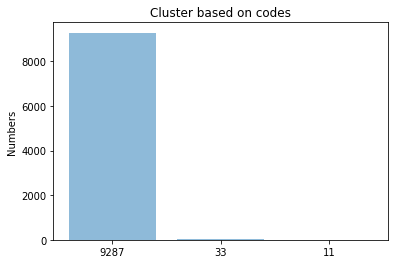

In [360]:
y_pos = np.arange(len(clusterdetails))

plt.bar(y_pos, clusterdetails['cluster'], align='center', alpha=0.5)
plt.xticks(y_pos,clusterdetails['cluster'])
plt.ylabel('Numbers')
plt.title('Cluster based on codes')

plt.show()

In [367]:
plot_data = [
    go.Histogram(
        x=tx_logdetails['cluster']
    )
]

plot_layout = go.Layout(
        title='status code CLuster'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [328]:
cluster2 = tx_logdetails.query("cluster == 1")

In [329]:
cluster2.head(10)

,browser,ip_address,method,size,statuscode,timestamp,url,cluster
0,"""Mozilla/5.0",81.149.9.211,"""GET",203023,401,[17/May/2015:10:05:03,"""http://semicomplete.com/presentations/logstas...",1
1,"""Mozilla/5.0",81.149.9.211,"""GET",171717,401,[17/May/2015:10:05:43,"""http://semicomplete.com/presentations/logstas...",1
3,"""Mozilla/5.0",83.149.9.211,"""GET",7697,401,[17/May/2015:10:05:12,"""http://semicomplete.com/presentations/logstas...",1
5,"""Mozilla/5.0",83.149.9.211,"""GET",430406,401,[17/May/2015:10:05:34,"""http://semicomplete.com/presentations/logstas...",1
12,"""Mozilla/5.0",83.149.9.216,"""GET",8095,400,[17/May/2015:10:05:19,"""http://semicomplete.com/presentations/logstas...",1
13,"""Mozilla/5.0",83.149.9.216,"""GET",78075,400,[17/May/2015:10:05:33,"""http://semicomplete.com/presentations/logstas...",1
14,"""Mozilla/5.0",83.149.9.216,"""GET",25230,400,[17/May/2015:10:05:00,"""http://semicomplete.com/presentations/logstas...",1
16,"""Mozilla/5.0",83.149.9.216,"""GET",54662,400,[17/May/2015:10:05:59,"""http://semicomplete.com/presentations/logstas...",1
18,"""Mozilla/5.0",83.149.9.216,"""GET",4254,400,[17/May/2015:10:05:53,"""http://semicomplete.com/presentations/logstas...",1
19,"""Mozilla/5.0",83.149.9.216,"""GET",220562,400,[17/May/2015:10:05:24,"""http://semicomplete.com/presentations/logstas...",1


In [330]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(tx_logdetails[["size"]])
tx_logdetails["cluster_size"] = kmeans.predict(tx_logdetails[["size"]])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [353]:
clusterdetails = tx_logdetails.groupby('cluster_size').count().reset_index()

,cluster_size,browser,ip_address,method,size,statuscode,timestamp,url,cluster
0,0,9287,9287,9287,9287,9287,9287,9287,9287
1,1,33,33,33,33,33,33,33,33
2,2,11,11,11,11,11,11,11,11


In [356]:
sum = 0
for y in clusterdetails['statuscode']:
    sum += y
for i in clusterdetails:
     clusterdetails['Cluster_Percentage'] = ((clusterdetails['statuscode'] * 100) / sum).round()

In [357]:
clusterdetails

,cluster_size,browser,ip_address,method,size,statuscode,timestamp,url,cluster,Cluster_Percentage
0,0,9287,9287,9287,9287,9287,9287,9287,9287,99.53
1,1,33,33,33,33,33,33,33,33,0.35
2,2,11,11,11,11,11,11,11,11,0.12


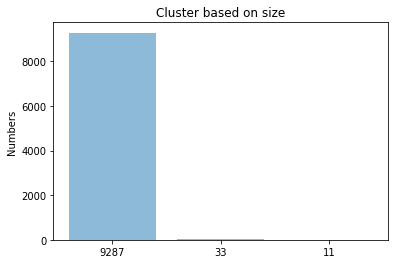

In [336]:
y_pos = np.arange(len(clusterdetails))

plt.bar(y_pos, clusterdetails['size'], align='center', alpha=0.5)
plt.xticks(y_pos,clusterdetails['cluster'])
plt.ylabel('Numbers')
plt.title('Cluster based on size')

plt.show()